# Data Analysis

In [12]:
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

# Load data
data = pd.read_csv('../Data/non_nan_data.csv')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


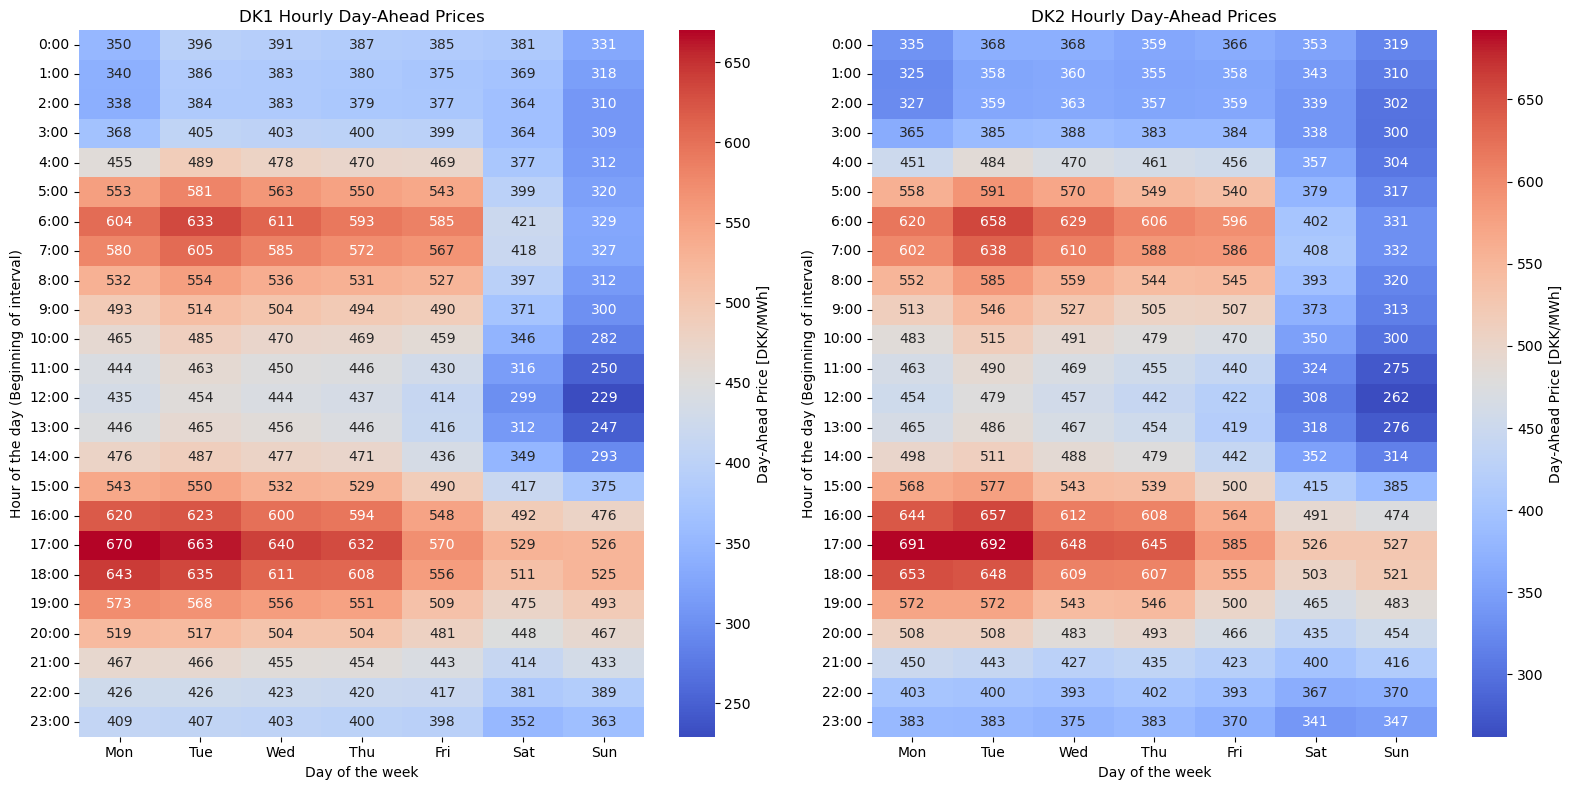

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the hour of the day and the day of the week
data['hour'] = data['DATE'].dt.hour
data['day_of_week'] = data['DATE'].dt.dayofweek  # Monday=0, Sunday=6

# Calculate the average spot price for DK1 and DK2 by day of week and hour
dk1_avg = data.groupby(['hour', 'day_of_week'])['DK1_spot'].mean().unstack()
dk2_avg = data.groupby(['hour', 'day_of_week'])['DK2_spot'].mean().unstack()

# Create the plot with two subplots (one for DK1 and one for DK2)
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Plot the heatmap for DK1
sns.heatmap(dk1_avg, ax=ax[0], cmap='coolwarm', cbar_kws={'label': 'Day-Ahead Price [DKK/MWh]'}, 
            xticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], 
            yticklabels=[f'{i}:00' for i in range(24)], annot=True, fmt=",.0f")  # Format numbers with no decimals
ax[0].set_title('DK1 Hourly Day-Ahead Prices')
ax[0].set_ylabel('Hour of the day (Beginning of interval)')
ax[0].set_xlabel('Day of the week')

# Plot the heatmap for DK2
sns.heatmap(dk2_avg, ax=ax[1], cmap='coolwarm', cbar_kws={'label': 'Day-Ahead Price [DKK/MWh]'}, 
            xticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], 
            yticklabels=[f'{i}:00' for i in range(24)], annot=True, fmt=",.0f")  # Format numbers with no decimals
ax[1].set_title('DK2 Hourly Day-Ahead Prices')
ax[1].set_ylabel('Hour of the day (Beginning of interval)')
ax[1].set_xlabel('Day of the week')

# Show the plot
plt.tight_layout()
plt.show()


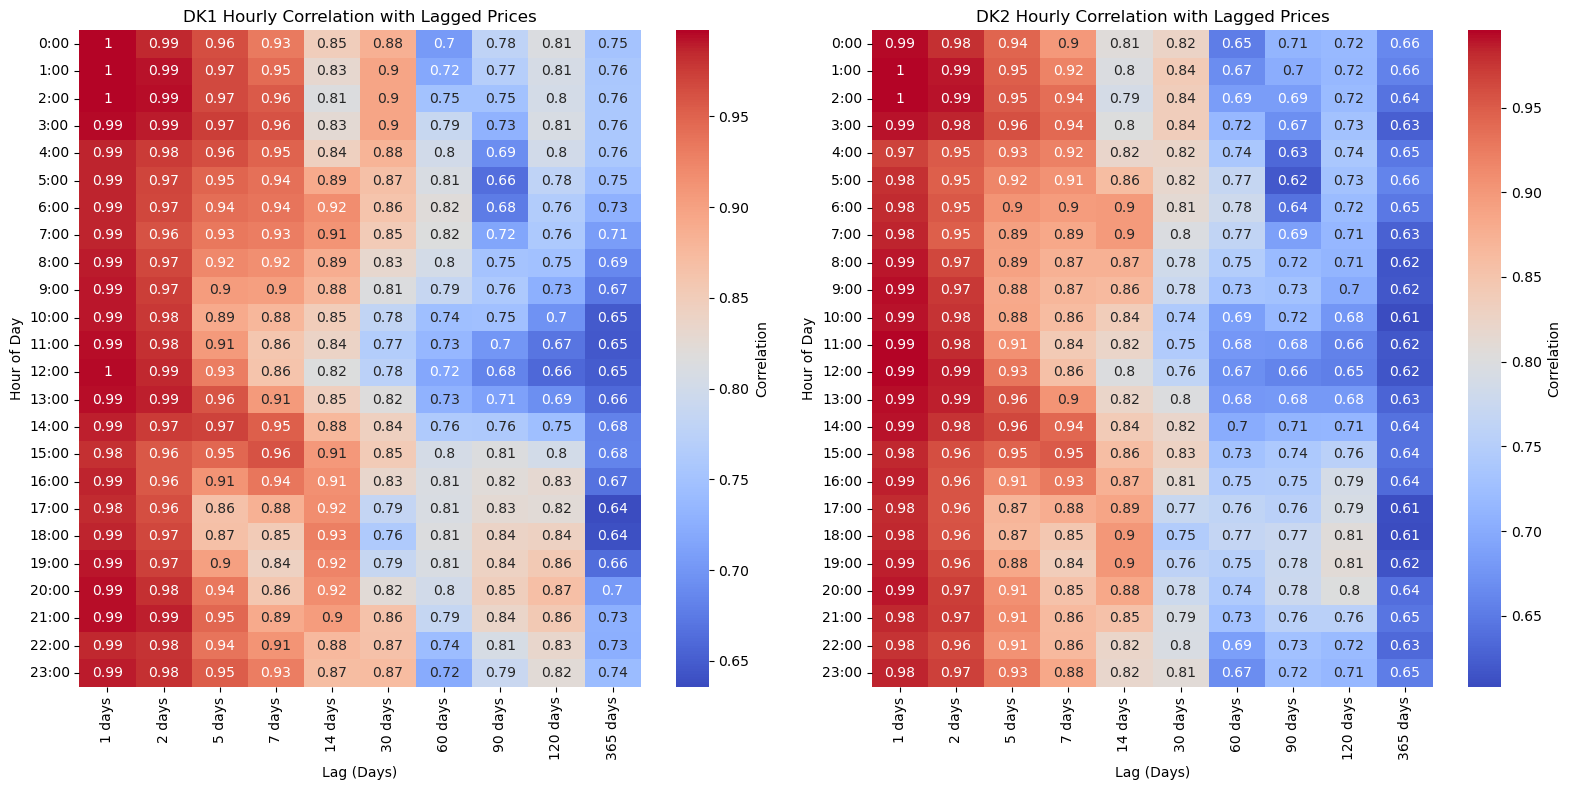

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the DATE column to datetime format
data['DATE'] = pd.to_datetime(data['DATE'])

# Extract the hour of the day
data['hour'] = data['DATE'].dt.hour

# List of lags (in days)
lags = [1, 2, 5, 7, 14, 30, 60, 90, 120 , 365]  # Days: 1-5, 1 week (7 days), 1 month (30 days), 1 year (365 days)

# Prepare an empty DataFrame for correlation values
correlation_dk1 = pd.DataFrame(index=range(24), columns=[f'Lag {lag} days' for lag in lags])

# Calculate the correlation for DK1 spot prices at each hour for different lags
for lag in lags:
    data[f'DK1_spot_lag_{lag}'] = data['DK1_spot'].shift(lag)  # Create lagged values
    
    for hour in range(24):
        # Filter data by hour and calculate correlation with lagged values
        hour_data = data[data['hour'] == hour]
        correlation_dk1.loc[hour, f'Lag {lag} days'] = hour_data['DK1_spot'].corr(hour_data[f'DK1_spot_lag_{lag}'])

# Prepare an empty DataFrame for DK2 correlation values
correlation_dk2 = pd.DataFrame(index=range(24), columns=[f'Lag {lag} days' for lag in lags])

# Calculate the correlation for DK2 spot prices at each hour for different lags
for lag in lags:
    data[f'DK2_spot_lag_{lag}'] = data['DK2_spot'].shift(lag)  # Create lagged values
    
    for hour in range(24):
        # Filter data by hour and calculate correlation with lagged values
        hour_data = data[data['hour'] == hour]
        correlation_dk2.loc[hour, f'Lag {lag} days'] = hour_data['DK2_spot'].corr(hour_data[f'DK2_spot_lag_{lag}'])

# Ensure the data is numeric and replace NaNs with 0 (or other value if appropriate)
correlation_dk1 = correlation_dk1.apply(pd.to_numeric, errors='coerce').fillna(0)
correlation_dk2 = correlation_dk2.apply(pd.to_numeric, errors='coerce').fillna(0)

# Plot the heatmaps
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Plot the heatmap for DK1 correlations
sns.heatmap(correlation_dk1, ax=ax[0], cmap='coolwarm', cbar_kws={'label': 'Correlation'},
            xticklabels=[f'{lag} days' for lag in lags], yticklabels=[f'{i}:00' for i in range(24)], annot=True)
ax[0].set_title('DK1 Hourly Correlation with Lagged Prices')
ax[0].set_xlabel('Lag (Days)')
ax[0].set_ylabel('Hour of Day')

# Plot the heatmap for DK2 correlations
sns.heatmap(correlation_dk2, ax=ax[1], cmap='coolwarm', cbar_kws={'label': 'Correlation'},
            xticklabels=[f'{lag} days' for lag in lags], yticklabels=[f'{i}:00' for i in range(24)], annot=True)
ax[1].set_title('DK2 Hourly Correlation with Lagged Prices')
ax[1].set_xlabel('Lag (Days)')
ax[1].set_ylabel('Hour of Day')

# Show the plot
plt.tight_layout()
plt.show()

